In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style="whitegrid")

### Loading and details of Customers dataset

In [5]:
customers = pd.read_csv('Customers.csv')

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
customers.shape


(200, 4)

In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [10]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

### Check for missing values in Customers

In [12]:
print("Missing values in Customers:\n", customers.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


### Loading and details of Products dataset

In [14]:
products = pd.read_csv('Products.csv')

In [15]:
products.shape

(100, 4)

In [16]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [18]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


### Check for missing values in Products

In [20]:
print("Missing values in Products:\n", products.isnull().sum())

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


### Loading and details of Transactions dataset

In [22]:
transactions = pd.read_csv('Transactions.csv')
transactions.shape
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [23]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [24]:
transactions.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

### Check for missing values in Transactions

In [26]:
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# EDA Exploratory Data Analysis (EDA)

## Region Distribution of Customers

In [29]:
region_counts = customers['Region'].value_counts(sort=False)
region_counts

Region
South America    59
Asia             45
North America    46
Europe           50
Name: count, dtype: int64

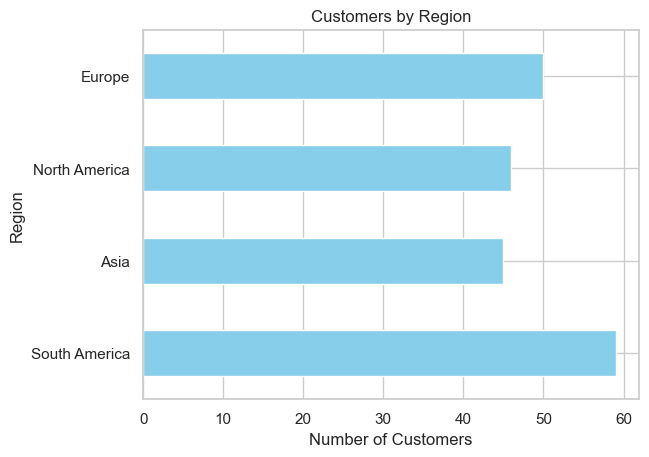

In [30]:
region_counts.plot(kind='barh', color='skyblue', title="Customers by Region")
plt.xlabel("Number of Customers")
plt.show()

## Price Distribution Across Product Categories

In [32]:
products['Category'].value_counts(sort=False)

Category
Books          26
Electronics    26
Home Decor     23
Clothing       25
Name: count, dtype: int64

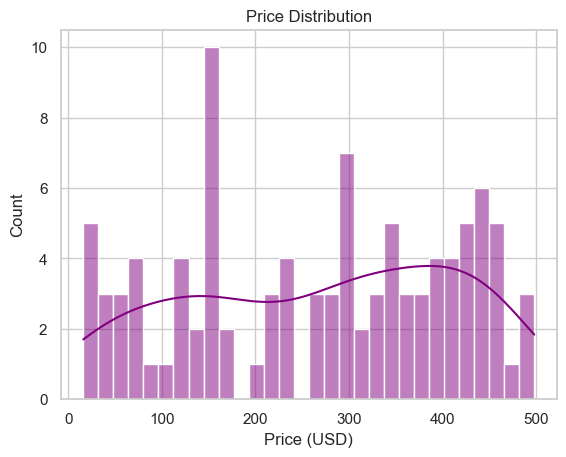

In [33]:
# plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=30, kde=True, color='purple')#data=products, x='Price', bins=30, kde=True, color='purple', hue='Category'
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.show()

## Highest Priced Products by Category

In [35]:
highest_priced_products = products.groupby('Category')['Price'].max().reset_index()
highest_priced_products

,Category,Price
0,Books,497.76
1,Clothing,481.78
2,Electronics,459.86
3,Home Decor,454.53


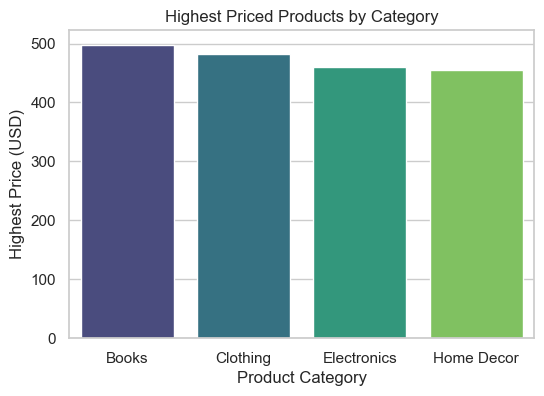

In [36]:
plt.figure(figsize=(6, 4))
sns.barplot(data=highest_priced_products, x='Category', y='Price', palette='viridis',hue = 'Category')#assigning x to hue for pallette effect
plt.title('Highest Priced Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Highest Price (USD)')
# plt.xticks(rotation=45)
plt.show()

In [37]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


## Merge datasets for further analysis

In [39]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

## Revenue by Region


In [41]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
revenue_by_region

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

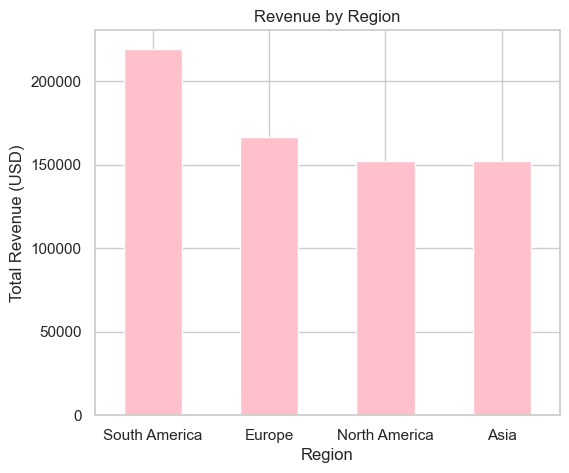

In [42]:
plt.figure(figsize=(6, 5))
revenue_by_region.plot(kind='bar', color='pink', title="Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=0)
plt.show()

## Top Revenue-Generating Products

In [44]:
revenue_by_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
revenue_by_product

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64

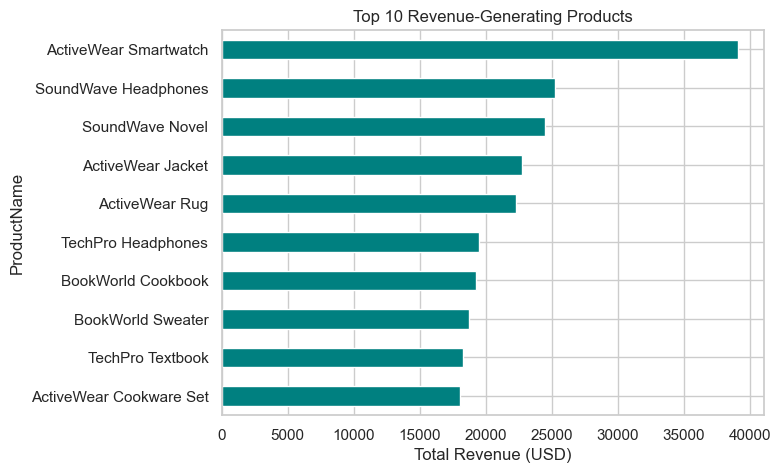

In [45]:
plt.figure(figsize=(7, 5))
revenue_by_product.plot(kind='barh', color='teal', title="Top 10 Revenue-Generating Products")
plt.xlabel("Total Revenue (USD)")
plt.gca().invert_yaxis()
plt.show()

## Revenue Trends Over Time

In [47]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
# monthly_revenue

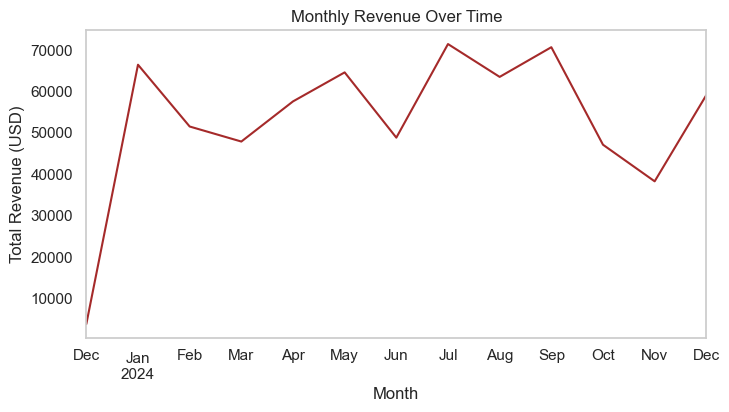

In [48]:
plt.figure(figsize=(8, 4))
monthly_revenue.plot(color='brown', title="Monthly Revenue Over Time")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Month")
plt.grid()
plt.show()

## Most Frequently Bought Products

In [50]:
most_purchased_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
most_purchased_products

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

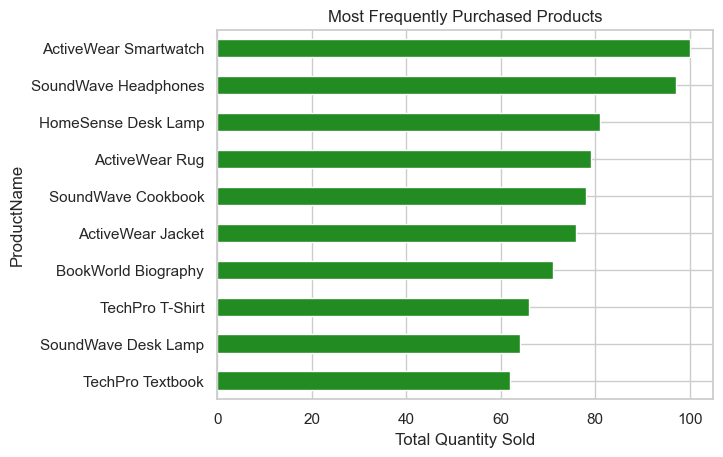

In [51]:
most_purchased_products.plot(kind='barh', color='forestgreen', title="Most Frequently Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

## Average Order Value (AOV) Trends Over Time

In [53]:
aov_by_month = monthly_revenue / merged_data.groupby('TransactionMonth')['TransactionID'].nunique()
aov_by_month

TransactionMonth
2023-12    942.380000
2024-01    620.340093
2024-02    668.302208
2024-03    597.859125
2024-04    668.826279
2024-05    750.322558
2024-06    706.828696
2024-07    743.399896
2024-08    674.858936
2024-09    735.455729
2024-10    672.331714
2024-11    670.602982
2024-12    757.041026
Freq: M, dtype: float64

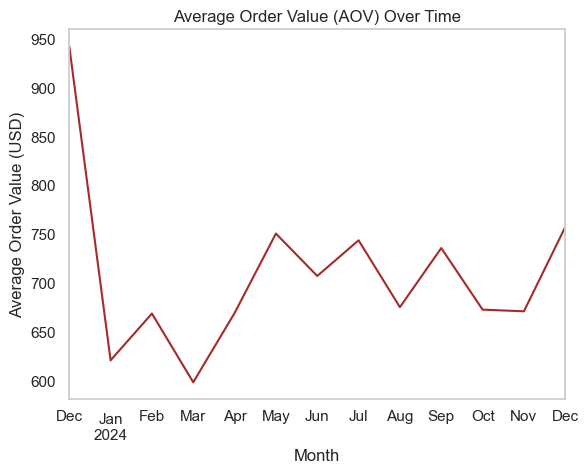

In [54]:
aov_by_month.plot(color='brown', title="Average Order Value (AOV) Over Time")
plt.ylabel("Average Order Value (USD)")
plt.xlabel("Month")
plt.grid()
plt.show()

## High-Value Customers by Region

In [56]:
high_value_customers = merged_data[merged_data['TotalValue'] > 500].groupby('Region')['CustomerID'].nunique()
high_value_customers

Region
Asia             42
Europe           45
North America    44
South America    55
Name: CustomerID, dtype: int64

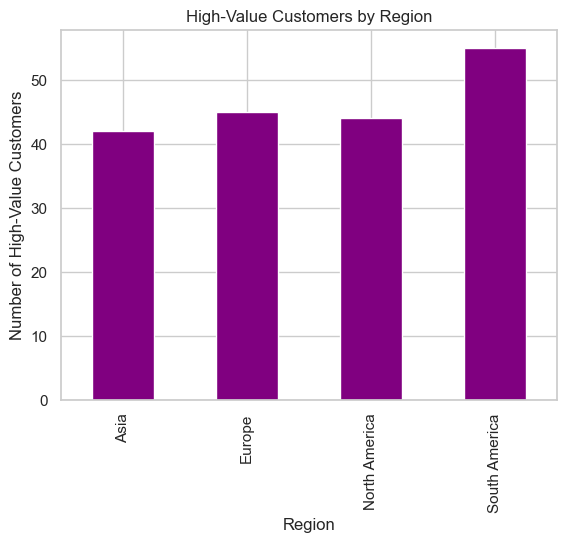

In [57]:
high_value_customers.plot(kind='bar', color='purple', title="High-Value Customers by Region")
plt.ylabel("Number of High-Value Customers")
plt.show()